# ACHMAD NUR BANI SUTA (2209106016)
## Posttest 7

### Menghapus Folder Jika Ada

In [1]:
!rm -rf /content/test

In [2]:
!rm -rf /content/train

In [3]:
!rm -rf /content/validation

In [4]:
!rm -rf /content/labelnames.csv

### Mengekstrak Folder Dataset

LINK DATASET : https://www.kaggle.com/datasets/ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset/data

In [5]:
!unzip 'archive_6.zip'

Archive:  archive_6.zip
  inflating: labelnames.csv          
  inflating: test/adidas/Adidas (18).jpg  
  inflating: test/adidas/Adidas (19).jpg  
  inflating: test/adidas/Adidas (20).jpg  
  inflating: test/adidas/Adidas (21).JPG  
  inflating: test/adidas/Adidas (22).jpg  
  inflating: test/adidas/Adidas (23).jpg  
  inflating: test/adidas/Adidas (24).jpg  
  inflating: test/adidas/Adidas (25).jpg  
  inflating: test/adidas/Adidas (26).jpg  
  inflating: test/adidas/Adidas (27).jpg  
  inflating: test/adidas/aadidas_ (10).jpg  
  inflating: test/adidas/aadidas_ (11).jpg  
  inflating: test/adidas/aadidas_ (12).jpg  
  inflating: test/adidas/aadidas_ (13).jpg  
  inflating: test/adidas/aadidas_ (14).jpg  
  inflating: test/adidas/aadidas_ (15).jpg  
  inflating: test/adidas/aadidas_ (16).jpg  
  inflating: test/adidas/aadidas_ (17).jpg  
  inflating: test/adidas/aadidas_ (18).jpg  
  inflating: test/adidas/aadidas_ (19).jpg  
  inflating: test/adidas/aadidas_ (2).jpg  
  inflating: t

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Mengubah Bentuk Dari Train dan Val

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=10,
    fill_mode='nearest',
    brightness_range=[0.2,1.2],
    vertical_flip = True,
    horizontal_flip = True,
    zoom_range = 0.1,
)

val_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [8]:
train_generator  = train_datagen.flow_from_directory(
    '/content/train',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator  = val_datagen.flow_from_directory(
    '/content/validation',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 460 images belonging to 2 classes.
Found 55 images belonging to 2 classes.


### Import Library

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Membuat Model

In [10]:
model = Sequential([
    # 1. feature extraction layer
    Conv2D(16,(3,3), activation = 'relu', input_shape = (150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    # 2. fully connected layer
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

### Membuat Callback

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

### Melatih Model

In [12]:
history = model.fit(train_generator, epochs = 50,
          validation_data = val_generator,
          verbose = 1, callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - 16s 266ms/step - loss: 0.6999 - accuracy: 0.4804 - val_loss: 0.6886 - val_accuracy: 0.5818
Epoch 2/50
15/15 [==============================] - 4s 250ms/step - loss: 0.6955 - accuracy: 0.5370 - val_loss: 0.6907 - val_accuracy: 0.5273
Epoch 3/50
15/15 [==============================] - 4s 243ms/step - loss: 0.6781 - accuracy: 0.5891 - val_loss: 0.7492 - val_accuracy: 0.5636
Epoch 4/50
15/15 [==============================] - 4s 239ms/step - loss: 0.6895 - accuracy: 0.5261 - val_loss: 0.6660 - val_accuracy: 0.6000
Epoch 5/50
15/15 [==============================] - 5s 305ms/step - loss: 0.6654 - accuracy: 0.6304 - val_loss: 0.6816 - val_accuracy: 0.6364
Epoch 6/50
15/15 [==============================] - 4s 239ms/step - loss: 0.6598 - accuracy: 0.6109 - val_loss: 0.7319 - val_accuracy: 0.6000
Epoch 7/50
15/15 [==============================] - 4s 239ms/step - loss: 0.6456 - accuracy: 0.6196 - val_loss: 0.7036 - val_accuracy: 0.6000
Epoch 8/50
15/15

### Mengubah Bentuk dari Test

In [13]:
test_datagen  = ImageDataGenerator(
    rescale = 1/255
)

test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


### Mengecek Hasil dari Model

In [14]:
model.evaluate(test_generator)

2/2 [==============================] - 0s 256ms/step - loss: 0.7654 - accuracy: 0.7333


[0.7653670907020569, 0.7333333492279053]

### Membuat Hasil Plot

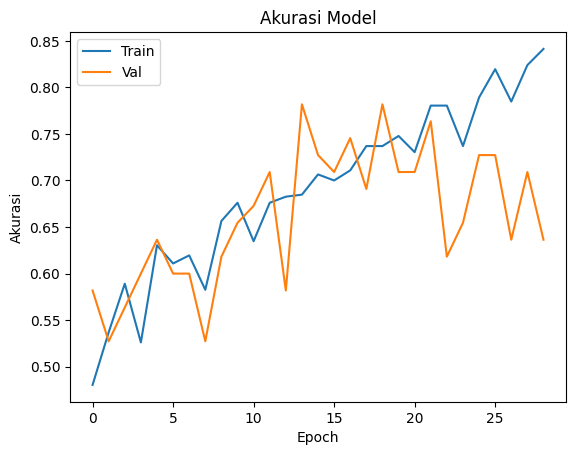

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Dari hasil di atas dapat kita lihat bahwa hasil train mencapai 80% sedangkan hasil dari test hanya di sekitar 70%

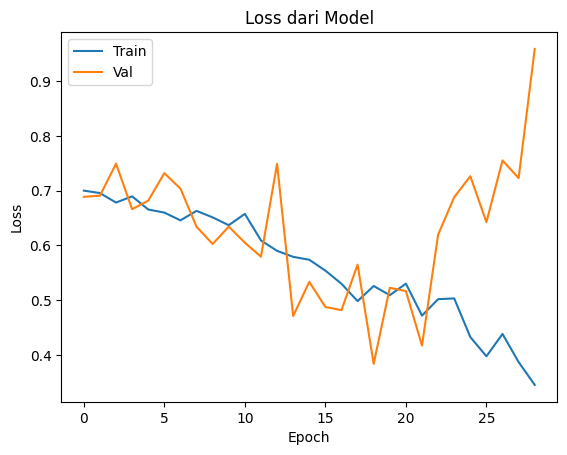

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss dari Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Dari hasil di atas dapat kita lihat bahwa hasil train mencapai di bawah 50% sedangkan hasil dari test hanya di sekitar di atas dari 79%